In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('submission.csv')
print(train.shape, test.shape, submission.shape)

(3498, 11) (483, 9) (483, 3)


In [4]:
# 데이터 확인
print(train.head(3))
print(test.head(3))
print(submission.head(3))

           id                                           SMILES     MLM  \
0  TRAIN_0000  CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC  26.010   
1  TRAIN_0001             Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1  29.270   
2  TRAIN_0002                 CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1   5.586   

      HLM  AlogP  Molecular_Weight  Num_H_Acceptors  Num_H_Donors  \
0  50.680  3.259           400.495                5             2   
1  50.590  2.169           301.407                2             1   
2  80.892  1.593           297.358                5             0   

   Num_RotatableBonds   LogD  Molecular_PolarSurfaceArea  
0                   8  3.259                      117.37  
1                   2  2.172                       73.47  
2                   3  1.585                       62.45  
         id                                             SMILES  AlogP  \
0  TEST_000            CC(C)Nc1ccnc(N2CCN(Cc3cccs3)C(CCO)C2)n1  2.641   
1  TEST_001     COc1cc(=O)n(-c2ccccc2)cc1C(=

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3498 entries, 0 to 3497
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          3498 non-null   object 
 1   SMILES                      3498 non-null   object 
 2   MLM                         3498 non-null   float64
 3   HLM                         3498 non-null   float64
 4   AlogP                       3496 non-null   float64
 5   Molecular_Weight            3498 non-null   float64
 6   Num_H_Acceptors             3498 non-null   int64  
 7   Num_H_Donors                3498 non-null   int64  
 8   Num_RotatableBonds          3498 non-null   int64  
 9   LogD                        3498 non-null   float64
 10  Molecular_PolarSurfaceArea  3498 non-null   float64
dtypes: float64(6), int64(3), object(2)
memory usage: 300.7+ KB


In [6]:
train.describe()

,MLM,HLM,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
count,3498.000000,3498.000000,3496.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000
mean,37.384742,53.090206,2.841399,363.881846,4.016581,1.098628,4.561178,2.682156,79.747278
std,35.695993,36.080081,1.608073,79.527022,1.511091,0.976266,2.357243,1.666996,28.849229
min,0.000000,0.000000,-4.137000,172.180000,0.000000,0.000000,0.000000,-4.920000,3.240000
25%,2.433000,15.905500,1.833000,304.389750,3.000000,0.000000,3.000000,1.620000,60.150000
50%,26.193000,58.023000,2.889000,350.255000,4.000000,1.000000,4.000000,2.709000,77.525000
75%,70.807250,87.753000,3.958250,409.744750,5.000000,2.000000,6.000000,3.860000,96.540000
max,131.720000,135.336000,9.190000,1360.467000,15.000000,10.000000,38.000000,9.190000,296.430000


In [7]:
train.isnull().sum()

id                            0
SMILES                        0
MLM                           0
HLM                           0
AlogP                         2
Molecular_Weight              0
Num_H_Acceptors               0
Num_H_Donors                  0
Num_RotatableBonds            0
LogD                          0
Molecular_PolarSurfaceArea    0
dtype: int64

In [8]:
num_cols = train.select_dtypes(exclude='object')
num_cols = num_cols.drop(['MLM'], axis=1)
cols = train.select_dtypes(exclude='object')
cols = cols.drop(['HLM'], axis=1)
num_cols

,HLM,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
0,50.680,3.259,400.495,5,2,8,3.259,117.37
1,50.590,2.169,301.407,2,1,2,2.172,73.47
2,80.892,1.593,297.358,5,0,3,1.585,62.45
3,2.000,4.771,494.652,6,0,5,3.475,92.60
4,99.990,2.335,268.310,3,0,1,2.337,42.43
...,...,...,...,...,...,...,...,...
3493,3.079,3.409,396.195,3,1,5,3.409,64.74
3494,47.630,1.912,359.381,4,1,3,1.844,77.37
3495,1.790,1.941,261.320,3,1,6,2.124,70.14
3496,2.770,0.989,284.696,5,1,5,0.989,91.51


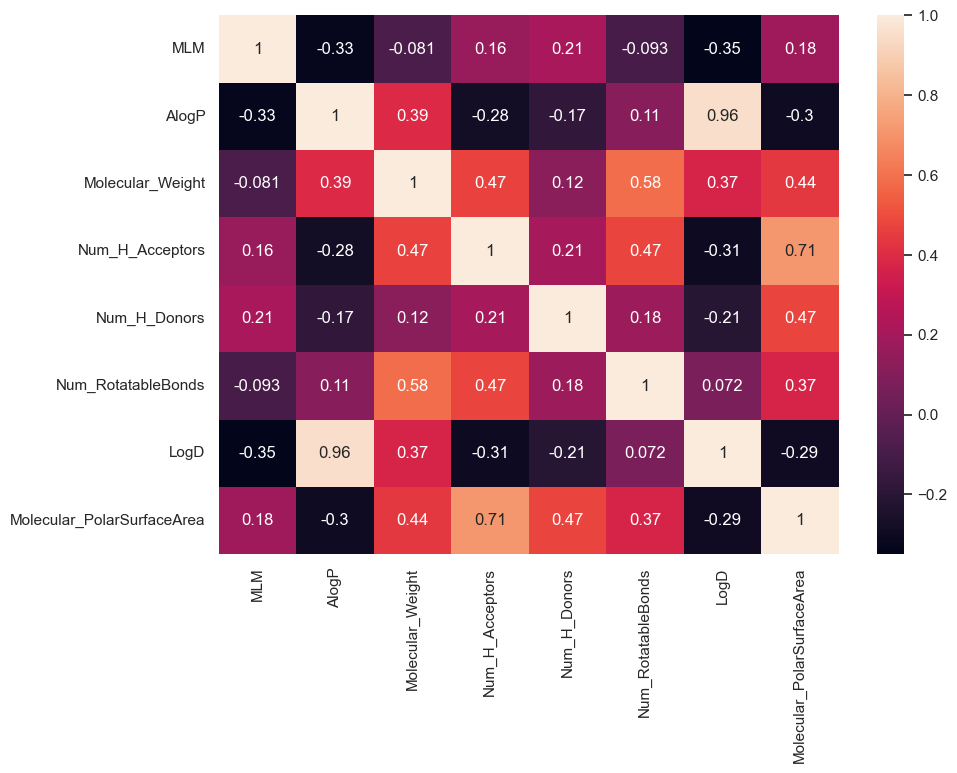

In [9]:
plt.figure(figsize=(10,7))
sns.set(font_scale=1.0)
sns.heatmap(cols.corr(), annot=True, cbar=True)
plt.show()

In [10]:
# LogD, AlogP
df = train[['MLM', 'LogD', 'AlogP', 'Num_H_Donors']]
df.info()
df1 = train[['HLM', 'LogD', 'AlogP', 'Num_H_Donors']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3498 entries, 0 to 3497
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MLM           3498 non-null   float64
 1   LogD          3498 non-null   float64
 2   AlogP         3496 non-null   float64
 3   Num_H_Donors  3498 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 109.4 KB


In [11]:
df.isnull().sum()

MLM             0
LogD            0
AlogP           2
Num_H_Donors    0
dtype: int64

In [12]:
df['AlogP'] = df['AlogP'].fillna(2.841399)
df1['AlogP'] = df['AlogP'].fillna(2.841399)

C:\Users\user\AppData\Local\Temp\ipykernel_7948\3177119349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AlogP'] = df['AlogP'].fillna(2.841399)
C:\Users\user\AppData\Local\Temp\ipykernel_7948\3177119349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['AlogP'] = df['AlogP'].fillna(2.841399)


In [13]:
plot_cols = ['MLM','LogD','AlogP']
plot_df = df.loc[:, plot_cols]
# plot_df

In [14]:
plot_col = ['HLM','LogD','AlogP']
plot = df1.loc[:, plot_col]
plot

,HLM,LogD,AlogP
0,50.680,3.259,3.259
1,50.590,2.172,2.169
2,80.892,1.585,1.593
3,2.000,3.475,4.771
4,99.990,2.337,2.335
...,...,...,...
3493,3.079,3.409,3.409
3494,47.630,1.844,1.912
3495,1.790,2.124,1.941
3496,2.770,0.989,0.989


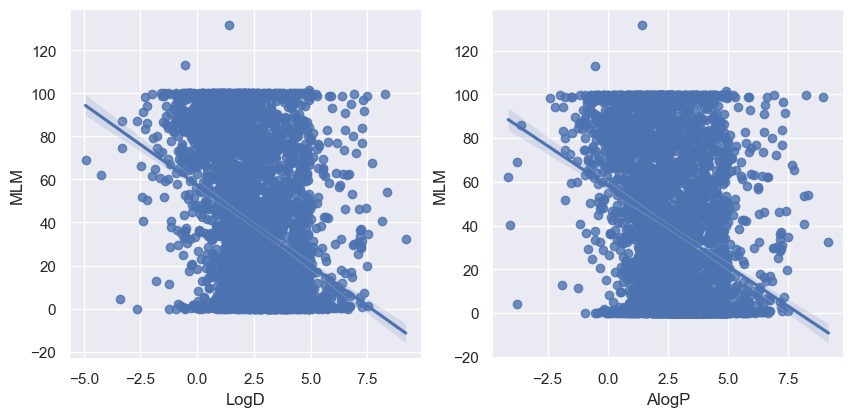

In [15]:
# MLM, HLM
plt.figure(figsize=(10,10))
for idx, col in enumerate(plot_cols[1:]):
    axl = plt.subplot(2, 2, idx+1)
    sns.regplot(x=col, y=plot_cols[0], data=plot_df, ax=axl)
plt.show()

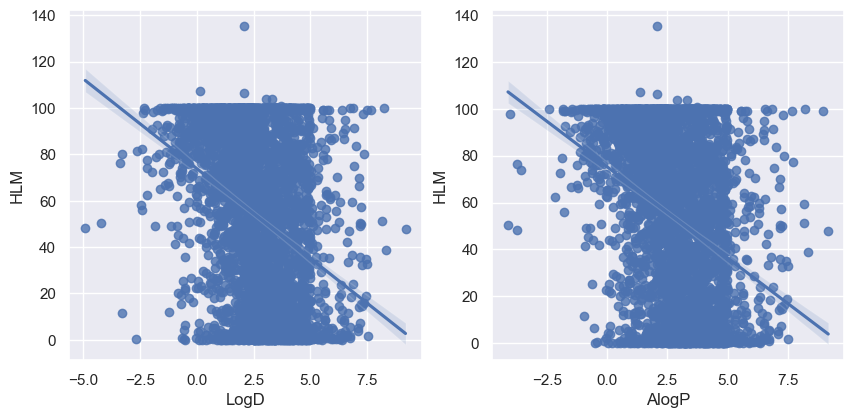

In [16]:
plt.figure(figsize=(10,10))
for idx, col in enumerate(plot_col[1:]):
    axl = plt.subplot(2, 2, idx+1)
    sns.regplot(x=col, y=plot_col[0], data=plot, ax=axl)
plt.show()

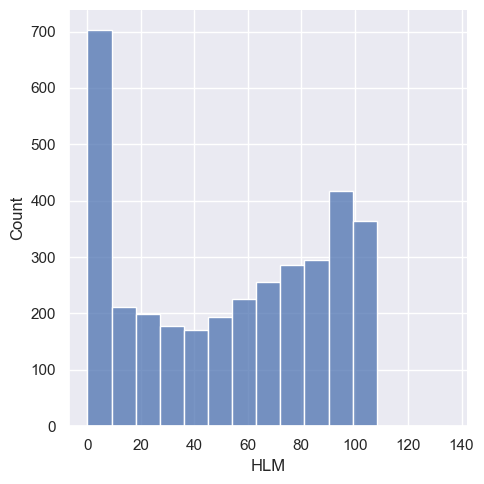

In [17]:
sns.displot(x='HLM', kind='hist', data=df1)
plt.show()

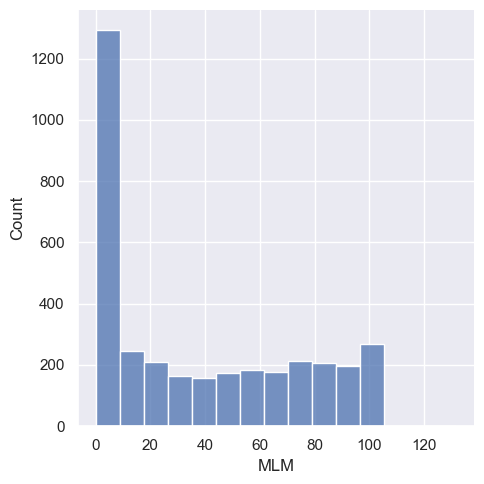

In [18]:
sns.displot(x='MLM', kind='hist', data=df)
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
iris_scaled = scaler.transform(df)
iris_scaled

array([[-0.31870154,  0.3460875 ,  0.25980164,  0.92341759],
       [-0.22736171, -0.30607699, -0.41831934, -0.10103998],
       [-0.8909484 , -0.65825782, -0.77666584, -1.12549756],
       ...,
       [ 0.52577164, -0.33487542, -0.56016483, -0.10103998],
       [-1.04661838, -1.01583835, -1.15243197, -0.10103998],
       [-1.03485067,  0.98325282,  0.920503  , -1.12549756]])

In [20]:
from sklearn.model_selection import train_test_split
X_data = df.loc[:,['LogD', 'AlogP']]
y_data = df.loc[:, 'MLM']
x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, shuffle=True, random_state=12)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(2798, 2) (2798,)
(700, 2) (700,)


In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
print("회귀계수(기울기):", np.round(lr.coef_, 1))
print("상수항(절편):", np.round(lr.intercept_, 1))
# 상수항(절편) = x(변수가) 0일때 결과 값

회귀계수(기울기): [-8.9  1.4]
상수항(절편): 57.9


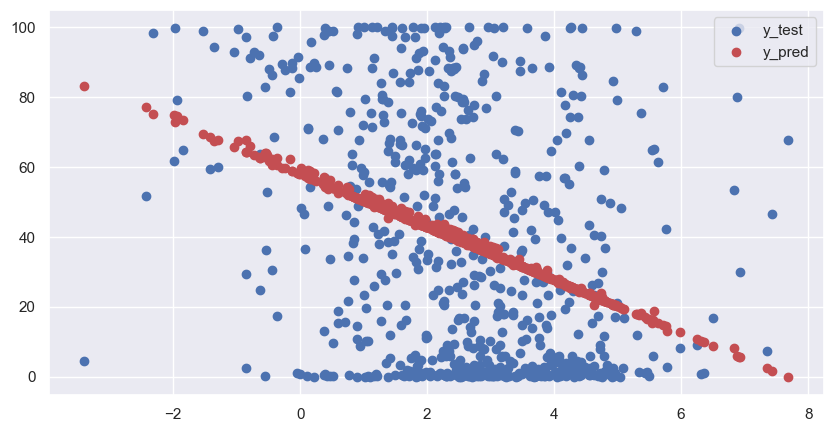

In [22]:
# 예측
y_test_pred = lr.predict(x_test)

# 예측값 실제값의 분포
plt.figure(figsize=(10,5)) # 그림또는 도표로 나타내기
plt.scatter(x_test['LogD'], y_test, label='y_test')
plt.scatter(x_test['LogD'], y_test_pred, c='r', label='y_pred')
plt.legend(loc='best')
plt.show()

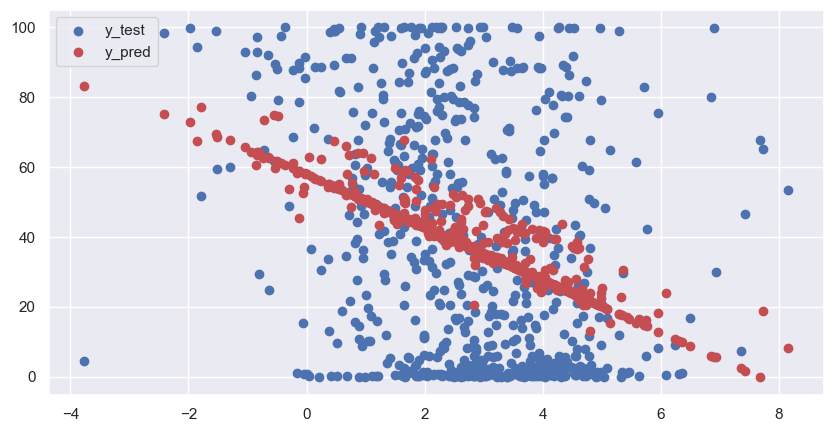

In [23]:
# 예측
y_test_pred = lr.predict(x_test)

# 예측값 실제값의 분포
plt.figure(figsize=(10,5)) # 그림또는 도표로 나타내기
plt.scatter(x_test['AlogP'], y_test, label='y_test')
plt.scatter(x_test['AlogP'], y_test_pred, c='r', label='y_pred')
plt.legend(loc='best')
plt.show()

In [24]:
# 평가
from sklearn.metrics import mean_squared_error
y_train_pred = lr.predict(x_train)

train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%3f" % train_mse)

test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %3f" % test_mse)

Train MSE:1121.612748
Test MSE: 1101.336911


In [25]:
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
mse_score = -1*cross_val_score(lr, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("개별 Fold의 MSE:", np.round(mse_score, 4))
print("평균 MSE:%4f" % np.mean(mse_score))

개별 Fold의 MSE: [1071.1569 1076.7549 1170.2124 1119.9755 1185.0204]
평균 MSE:1124.624029


In [26]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
x_train_poly = pf.fit_transform(x_train)
print("원본 학습 데이터 셋:", x_train.shape) # 2개인 이유 LATST, RM 이 두가지 값을 가지기 때문이고
print("2차 다항식 변환 데이터 셋:", x_train_poly.shape)

원본 학습 데이터 셋: (2798, 2)
2차 다항식 변환 데이터 셋: (2798, 6)


In [27]:
lr = LinearRegression()
lr.fit(x_train_poly, y_train) # y_train은 실제 결과값

# 테스트 데이터에 대한 예측 밒 평가
y_train_pred = lr.predict(x_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%3f" % train_mse)

x_test_poly = pf.fit_transform(x_test) # 학습한 예측결과랑 test값의 예측 결과 파악
y_test_pred = lr.predict(x_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%3f" % test_mse)

Train MSE:1082.742770
Test MSE:1084.620891


In [28]:
print(lr.predict(x_train_poly))

[36.1037557  35.8226015  55.46698447 ... 36.18119083 25.21221699
 27.06697763]
